<a href="https://colab.research.google.com/github/trirex79/python/blob/main/Analiza_danych/dane_gieldowe_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import bibliotek

In [ ]:

import numpy as np
import pandas as pd

print(f'Numpy: {np.__version__}')
print(f'Pandas: {pd.__version__}')

Numpy: 1.19.5
Pandas: 1.1.5


# Ładowanie danych

In [ ]:

def fetch_financial_data(company='AMZN'):
    """Pobiera dane dotyczące notowań spółek na giełdzie według symboli
    na serwisie stooq.pl"""
    import pandas_datareader.data as web
    return web.DataReader(name=company, data_source='stooq')

df = fetch_financial_data()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2021-08-18 to 2016-08-22
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1257 non-null   float64
 1   High    1257 non-null   float64
 2   Low     1257 non-null   float64
 3   Close   1257 non-null   float64
 4   Volume  1257 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.9 KB


In [ ]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2021-07-30,3347.95,3368.1400,3306.980,3327.59,9965593
2021-07-29,3627.75,3637.9500,3580.010,3599.92,5519952
2021-07-28,3633.78,3658.4204,3601.000,3630.32,2999378
2021-07-27,3698.50,3698.5000,3586.150,3626.39,4131890
2021-07-26,3673.17,3712.0800,3647.250,3699.82,2900068
...,...,...,...,...,...
2016-08-08,766.81,767.0000,761.015,766.56,1709639
2016-08-05,764.81,768.4700,763.090,765.98,2516246
2016-08-04,753.70,765.0000,750.350,760.77,2557512


In [ ]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-07-30,3347.95,3368.1400,3306.98,3327.59,9965593
2021-07-29,3627.75,3637.9500,3580.01,3599.92,5519952
2021-07-28,3633.78,3658.4204,3601.00,3630.32,2999378
2021-07-27,3698.50,3698.5000,3586.15,3626.39,4131890
2021-07-26,3673.17,3712.0800,3647.25,3699.82,2900068


In [ ]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2016-08-08,766.81,767.00,761.015,766.56,1709639
2016-08-05,764.81,768.47,763.090,765.98,2516246
2016-08-04,753.70,765.00,750.350,760.77,2557512
2016-08-03,757.06,758.89,752.250,754.55,3083438
2016-08-02,763.81,765.01,757.020,760.58,3167836


In [ ]:
df.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2021-07-30,3347.95,3368.1400,3306.98,3327.59,9965593
2021-07-29,3627.75,3637.9500,3580.01,3599.92,5519952
2021-07-28,3633.78,3658.4204,3601.00,3630.32,2999378


In [ ]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [ ]:
df.columns = [col.lower() for col in df.columns]
df.columns

Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
open,1258.0,1.865338e+03,8.486117e+02,730.00,1.092115e+03,1760.770,2.372130e+03,3.744000e+03
high,1258.0,1.884496e+03,8.591082e+02,743.26,1.106428e+03,1777.565,2.405775e+03,3.773078e+03
low,1258.0,1.843615e+03,8.367251e+02,710.10,1.087282e+03,1743.270,2.341784e+03,3.696793e+03
close,1258.0,1.864638e+03,8.476049e+02,719.07,1.101633e+03,1762.010,2.374427e+03,3.731410e+03
volume,1258.0,4.276295e+06,2.099220e+06,881337.00,2.890146e+06,3694802.500,5.115194e+06,1.655260e+07


In [ ]:
df = df.head(100)
df

,open,high,low,close,volume
Date,,,,,
2021-07-30,3347.95,3368.1400,3306.9800,3327.59,9965593
2021-07-29,3627.75,3637.9500,3580.0100,3599.92,5519952
2021-07-28,3633.78,3658.4204,3601.0000,3630.32,2999378
2021-07-27,3698.50,3698.5000,3586.1500,3626.39,4131890
2021-07-26,3673.17,3712.0800,3647.2500,3699.82,2900068
...,...,...,...,...,...
2021-03-16,3104.97,3128.9100,3075.8601,3091.86,2538764
2021-03-15,3074.57,3082.2400,3032.0900,3081.68,2918592
2021-03-12,3075.00,3098.9800,3045.5000,3089.49,2421888


##Wycinanie kolumn

In [ ]:
df.open

Date
2021-07-30    3347.95
2021-07-29    3627.75
2021-07-28    3633.78
2021-07-27    3698.50
2021-07-26    3673.17
               ...   
2021-03-16    3104.97
2021-03-15    3074.57
2021-03-12    3075.00
2021-03-11    3104.01
2021-03-10    3098.45
Name: open, Length: 100, dtype: float64

In [ ]:
df[['open','close']]

,open,close
Date,,
2021-07-30,3347.95,3327.59
2021-07-29,3627.75,3599.92
2021-07-28,3633.78,3630.32
2021-07-27,3698.50,3626.39
2021-07-26,3673.17,3699.82
...,...,...
2021-03-16,3104.97,3091.86
2021-03-15,3074.57,3081.68
2021-03-12,3075.00,3089.49


In [ ]:
df.iloc[:,[0,3]]

,open,close
Date,,
2021-07-30,3347.95,3327.59
2021-07-29,3627.75,3599.92
2021-07-28,3633.78,3630.32
2021-07-27,3698.50,3626.39
2021-07-26,3673.17,3699.82
...,...,...
2021-03-16,3104.97,3091.86
2021-03-15,3074.57,3081.68
2021-03-12,3075.00,3089.49


In [ ]:
df.iloc[0:4,[0,3]]

,open,close
Date,,
2021-07-30,3347.95,3327.59
2021-07-29,3627.75,3599.92
2021-07-28,3633.78,3630.32
2021-07-27,3698.50,3626.39


In [ ]:
df.iloc[:, -3:]

,low,close,volume
Date,,,
2021-07-30,3306.9800,3327.59,9965593
2021-07-29,3580.0100,3599.92,5519952
2021-07-28,3601.0000,3630.32,2999378
2021-07-27,3586.1500,3626.39,4131890
2021-07-26,3647.2500,3699.82,2900068
...,...,...,...
2021-03-16,3075.8601,3091.86,2538764
2021-03-15,3032.0900,3081.68,2918592
2021-03-12,3045.5000,3089.49,2421888


##Wycinanie wierszy

In [ ]:
df.iloc[0]

open         3347.95
high         3368.14
low          3306.98
close        3327.59
volume    9965593.00
Name: 2021-07-30 00:00:00, dtype: float64

In [ ]:
df.iloc[:3]

,open,high,low,close,volume
Date,,,,,
2021-07-30,3347.95,3368.1400,3306.98,3327.59,9965593
2021-07-29,3627.75,3637.9500,3580.01,3599.92,5519952
2021-07-28,3633.78,3658.4204,3601.00,3630.32,2999378


In [ ]:
df.loc['2021-07-29']

,open,high,low,close,volume
Date,,,,,
2021-07-29,3627.75,3637.95,3580.01,3599.92,5519952


##Obliczanie nowych kolumn

In [ ]:
df = fetch_financial_data('MSFT')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2021-08-18 to 2016-08-22
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1257 non-null   float64
 1   High    1257 non-null   float64
 2   Low     1257 non-null   float64
 3   Close   1257 non-null   float64
 4   Volume  1257 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.9 KB


In [ ]:
df.describe()

,Open,High,Low,Close,Volume
count,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03
mean,132.426239,133.680279,131.131034,132.487694,2.919721e+07
std,64.892482,65.576681,64.276170,64.983308,1.310842e+07
min,51.814000,52.396000,50.552000,52.009000,7.797724e+06
25%,79.488000,79.899000,78.862000,79.489000,2.074499e+07
50%,109.480000,109.970000,108.250000,109.360000,2.560501e+07
75%,182.410000,183.940000,180.210000,181.800000,3.337881e+07
max,292.630000,294.820000,290.520000,294.040000,1.148290e+08


In [ ]:
df['Average'] = (df.Open + df.Close) / 2
df.head()

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2021-08-18,292.04,294.82,290.27,290.73,21812985,291.385
2021-08-17,291.83,292.87,290.52,292.52,20113682,292.175
2021-08-16,292.63,294.26,289.47,294.04,22559132,293.335
2021-08-13,288.93,292.34,288.75,292.29,18283982,290.610
2021-08-12,286.08,289.42,285.79,289.26,14598285,287.670


In [ ]:
df = df.sort_index()
df.head()

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2016-08-22,53.293,53.430,52.979,53.359,15335079,53.3260
2016-08-23,53.569,53.830,53.524,53.561,18232204,53.5650
2016-08-24,53.478,53.700,53.401,53.617,17731419,53.5475
2016-08-25,53.552,53.932,53.459,53.821,17349761,53.6865
2016-08-26,53.923,54.312,53.379,53.700,20337823,53.8115


In [ ]:
df['Close_shift'] = df.Close.shift(1)
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift
Date,,,,,,,
2016-08-22,53.293,53.430,52.979,53.359,15335079,53.3260,NaN
2016-08-23,53.569,53.830,53.524,53.561,18232204,53.5650,53.359
2016-08-24,53.478,53.700,53.401,53.617,17731419,53.5475,53.561
2016-08-25,53.552,53.932,53.459,53.821,17349761,53.6865,53.617
2016-08-26,53.923,54.312,53.379,53.700,20337823,53.8115,53.821


In [ ]:
df['Daily_change'] = df.Close / df.Close_shift - 1 
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2016-08-22,53.293,53.430,52.979,53.359,15335079,53.3260,NaN,NaN
2016-08-23,53.569,53.830,53.524,53.561,18232204,53.5650,53.359,0.003786
2016-08-24,53.478,53.700,53.401,53.617,17731419,53.5475,53.561,0.001046
2016-08-25,53.552,53.932,53.459,53.821,17349761,53.6865,53.617,0.003805
2016-08-26,53.923,54.312,53.379,53.700,20337823,53.8115,53.821,-0.002248


In [ ]:
del df['Close_shift']
df.head()

,Open,High,Low,Close,Volume,Average,Daily_change
Date,,,,,,,
2016-08-22,53.293,53.430,52.979,53.359,15335079,53.3260,NaN
2016-08-23,53.569,53.830,53.524,53.561,18232204,53.5650,0.003786
2016-08-24,53.478,53.700,53.401,53.617,17731419,53.5475,0.001046
2016-08-25,53.552,53.932,53.459,53.821,17349761,53.6865,0.003805
2016-08-26,53.923,54.312,53.379,53.700,20337823,53.8115,-0.002248


In [ ]:
df.Daily_change.min()
df.Daily_change.max()

0.1422526991537787

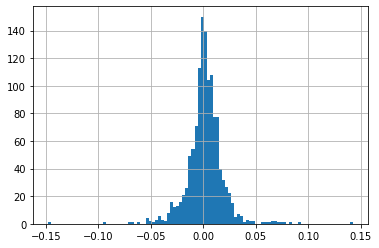

In [ ]:
df.Daily_change.hist(bins = 100)

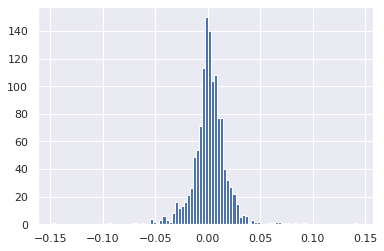

In [ ]:
import seaborn as sns
sns.set()
df.Daily_change.hist(bins = 100)

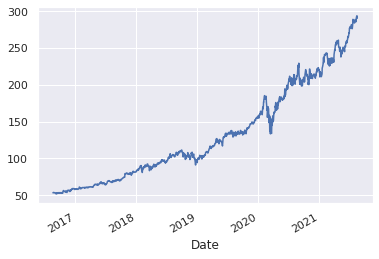

In [ ]:
df.Close.plot()

# Filtrowanie danych

In [ ]:
df.Daily_change > 0 

Date
2016-08-22    False
2016-08-23     True
2016-08-24     True
2016-08-25     True
2016-08-26    False
              ...  
2021-08-12     True
2021-08-13     True
2021-08-16     True
2021-08-17    False
2021-08-18    False
Name: Daily_change, Length: 1257, dtype: bool

In [ ]:
df[df.Daily_change < 0]

,Open,High,Low,Close,Volume,Average,Daily_change
Date,,,,,,,
2016-08-26,53.923,54.312,53.379,53.700,20337823,53.8115,-0.002248
2016-08-30,53.646,53.840,53.303,53.561,17284413,53.6035,-0.003646
2016-08-31,53.340,53.478,53.016,53.163,20673204,53.2515,-0.007431
2016-09-06,53.459,53.478,52.934,53.303,16196267,53.3810,-0.001049
2016-09-08,53.320,53.468,52.905,53.135,19473862,53.2275,-0.004030
...,...,...,...,...,...,...,...
2021-08-06,287.950,288.950,287.070,288.910,16621095,288.4300,-0.000208
2021-08-09,289.200,290.990,287.260,287.780,16148485,288.4900,-0.003911
2021-08-10,288.250,288.700,284.660,285.890,18652218,287.0700,-0.006568


In [ ]:
df_positive = df[df.Daily_change > 0]
df_positive.head()

,Open,High,Low,Close,Volume,Average,Daily_change
Date,,,,,,,
2016-08-23,53.569,53.830,53.524,53.561,18232204,53.5650,0.003786
2016-08-24,53.478,53.700,53.401,53.617,17731419,53.5475,0.001046
2016-08-25,53.552,53.932,53.459,53.821,17349761,53.6865,0.003805
2016-08-29,53.830,54.218,53.757,53.757,13741851,53.7935,0.001061
2016-09-01,52.746,53.496,52.746,53.274,25267415,53.0100,0.002088


In [ ]:
df_positive.Daily_change.mean() #średnia dodatnia kwota zwrotu

0.011582476166565199

In [ ]:
df_negative = df[df.Daily_change < 0]
df_negative.Daily_change.mean()

-0.011215039326844877

In [ ]:
df[df.Close == df.High]

,Open,High,Low,Close,Volume,Average,Daily_change
Date,,,,,,,
2016-10-24,55.462,56.438,55.452,56.438,54952525,55.950,0.022446
2016-11-25,56.168,56.382,56.009,56.382,8530896,56.275,0.002133
2017-05-30,65.778,66.360,65.759,66.360,18098130,66.069,0.006430
2018-01-26,88.677,89.573,88.162,89.573,30417685,89.125,0.018755
2018-03-09,91.167,92.365,90.890,92.365,38606957,91.766,0.022347
2019-01-30,101.370,103.050,101.090,103.050,51067041,102.210,0.033394


In [ ]:
df.index

DatetimeIndex(['2016-08-22', '2016-08-23', '2016-08-24', '2016-08-25',
               '2016-08-26', '2016-08-29', '2016-08-30', '2016-08-31',
               '2016-09-01', '2016-09-02',
               ...
               '2021-08-05', '2021-08-06', '2021-08-09', '2021-08-10',
               '2021-08-11', '2021-08-12', '2021-08-13', '2021-08-16',
               '2021-08-17', '2021-08-18'],
              dtype='datetime64[ns]', name='Date', length=1257, freq=None)

In [ ]:
df[df.index > '2021-08-05'].mean()

Open            2.892856e+02
High            2.911622e+02
Low             2.876778e+02
Close           2.897578e+02
Volume          1.808584e+07
Average         2.895217e+02
Daily_change    6.952376e-04
dtype: float64

In [ ]:
df[(df.index >= '2021-08-01') & (df.index < '2021-8-15')]

,Open,High,Low,Close,Volume,Average,Daily_change
Date,,,,,,,
2021-08-02,285.81,286.23,283.20,284.28,16298499,285.045,-0.000316
2021-08-03,284.87,286.68,283.46,286.57,17913276,285.720,0.008055
2021-08-04,285.67,287.04,284.11,285.96,16222298,285.815,-0.002129
2021-08-05,286.33,289.08,285.55,288.97,13926777,287.650,0.010526
2021-08-06,287.95,288.95,287.07,288.91,16621095,288.430,-0.000208
2021-08-09,289.20,290.99,287.26,287.78,16148485,288.490,-0.003911
2021-08-10,288.25,288.70,284.66,285.89,18652218,287.070,-0.006568
2021-08-11,286.66,288.11,285.31,286.40,13982651,286.530,0.001784
2021-08-12,286.08,289.42,285.79,289.26,14598285,287.670,0.009986


In [ ]:
df[(df.index == '2021-08-02') | (df.index == '2021-08-12')]

,Open,High,Low,Close,Volume,Average,Daily_change
Date,,,,,,,
2021-08-02,285.81,286.23,283.20,284.28,16298499,285.045,-0.000316
2021-08-12,286.08,289.42,285.79,289.26,14598285,287.670,0.009986


In [ ]:
df[(df.index.month == 5) & (df.index.year == 2021)]

,Open,High,Low,Close,Volume,Average,Daily_change
Date,,,,,,,
2021-05-03,252.34,253.28,250.06,250.80,19709547,251.570,-0.001274
2021-05-04,249.91,250.15,244.72,246.75,32894542,248.330,-0.016148
2021-05-05,248.02,248.45,244.78,245.43,21993922,246.725,-0.005350
2021-05-06,245.41,248.80,243.66,248.67,26603087,247.040,0.013201
2021-05-07,251.09,253.23,250.11,251.40,27147204,251.245,0.010978
2021-05-10,249.81,250.67,246.08,246.14,29423767,247.975,-0.020923
2021-05-11,243.52,245.56,241.55,245.19,33783822,244.355,-0.003860
2021-05-12,241.15,243.35,237.07,237.99,36839468,239.570,-0.029365
2021-05-13,240.78,244.56,240.40,242.01,29749547,241.395,0.016891
